<a href="https://colab.research.google.com/github/SHAO47/DeepModel/blob/main/LGC_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

# 匯入資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))

# train data=  60000
# test data= 10000

11490434/11490434 [==============================] - 1s 0us/step
train data=  60000
test data= 10000


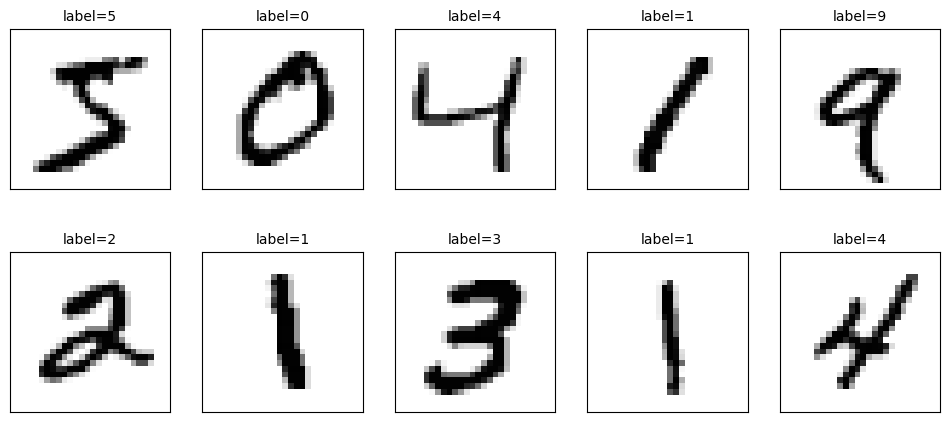

In [2]:

import matplotlib.pyplot as plt

# 建立函數要來畫多圖的
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):

  # 設定顯示圖形的大小
  fig= plt.gcf()
  fig.set_size_inches(12,14)

  # 最多25張
  if num>25:num=25

  # 一張一張畫
  for i in range(0,num):

    # 建立子圖形5*5(五行五列)
    ax=plt.subplot(5,5,i+1)

    # 畫出子圖形
    ax.imshow(images[idx],cmap='binary')

    # 標題和label
    title="label=" +str(labels[idx])

    # 如果有傳入預測結果也顯示
    if len(prediction)>0:
      title+=",predict="+str(prediction[idx])

    # 設定子圖形的標題大小
    ax.set_title(title,fontsize=10)

    # 設定不顯示刻度
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [3]:

print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))


train data=  60000
test data= 10000


In [4]:
# 影像資料--------------------------------------
# 代表 train image 總共有6萬張，每一張是28*28的圖片
# label 也有6萬個
# 所以要把二維的圖片矩陣先轉換成一維
# 這裡的784是因為 28*28
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')


# 由於是圖片最大的是255，所以全部除以255
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

# 標註資料--------------------------------------
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [5]:
from keras.models import Sequential
from keras.layers import Dense

# 建立模型
model = Sequential()

# 建立輸入層和隱藏層
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))
# 定義隱藏層神經元個數256
# 輸入為28*28=784 個float 數字
# 使用 normal distribution 常態分布的亂數，初始化 weight權重 bias 偏差
# 定義激活函數為 relu


# 建立輸出層
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
# 定義輸出層為10個 (數字0~9)
# 也是使用常態分佈初始化
# 定義激活函數是 softmax
# 這裡建立的Dense 層，不用設定 input dim ，因為keras 會自動照上一層的256設定

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 模型訓練之前要用 compele 對模型進行設定
# loss 深度學習通常用 cross entropy 交叉嫡，訓練效果較好
# optimizer 設定訓練時依優化的方法，在深度學習使用 adam 最優化方法，最快收斂提高準確度
# metrics 設定評估模型的方式是 accuracy 準確率

# 開始訓練

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)
# x 是訓練資料
# y 是label 資料
# 設定參數 validation 切0.2起來驗證
# epoch=10 是訓練週期為10
# batch_size=200 每一批訓練200筆資料
# verbose =2 顯示訓練過程

# 所以以上的程式會執行10次
# 每一次執行200筆資料 ，總共訓練資料原本有60000*0.8=48000
# 48000/200=24 要跑240批次
# epoch 每一次訓練週期紀錄結果在 train_history 裡面

Epoch 1/10
240/240 - 3s - loss: 0.4383 - accuracy: 0.8837 - val_loss: 0.2160 - val_accuracy: 0.9418 - 3s/epoch - 14ms/step
Epoch 2/10
240/240 - 2s - loss: 0.1862 - accuracy: 0.9472 - val_loss: 0.1530 - val_accuracy: 0.9562 - 2s/epoch - 8ms/step
Epoch 3/10
240/240 - 2s - loss: 0.1321 - accuracy: 0.9622 - val_loss: 0.1255 - val_accuracy: 0.9634 - 2s/epoch - 8ms/step
Epoch 4/10
240/240 - 3s - loss: 0.1012 - accuracy: 0.9716 - val_loss: 0.1092 - val_accuracy: 0.9676 - 3s/epoch - 13ms/step
Epoch 5/10
240/240 - 2s - loss: 0.0808 - accuracy: 0.9772 - val_loss: 0.1024 - val_accuracy: 0.9703 - 2s/epoch - 8ms/step
Epoch 6/10
240/240 - 2s - loss: 0.0662 - accuracy: 0.9819 - val_loss: 0.0931 - val_accuracy: 0.9712 - 2s/epoch - 8ms/step
Epoch 7/10
240/240 - 2s - loss: 0.0542 - accuracy: 0.9848 - val_loss: 0.0893 - val_accuracy: 0.9732 - 2s/epoch - 8ms/step
Epoch 8/10
240/240 - 2s - loss: 0.0448 - accuracy: 0.9880 - val_loss: 0.0813 - val_accuracy: 0.9747 - 2s/epoch - 8ms/step
Epoch 9/10
240/240 - 2

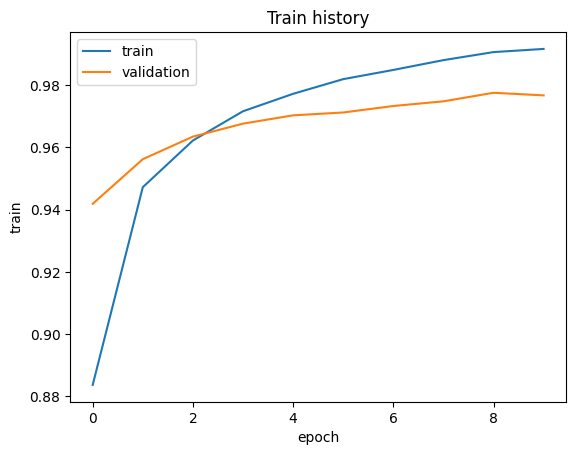

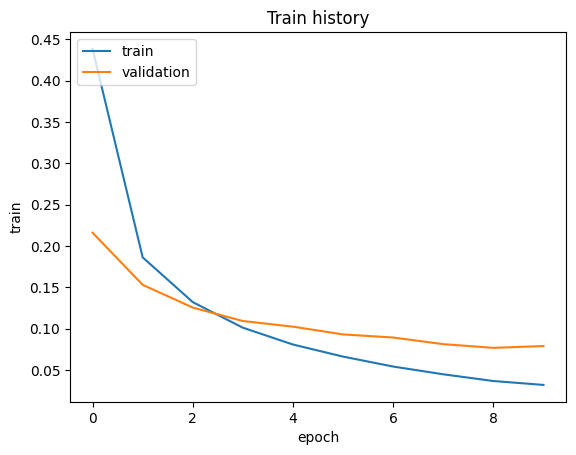

In [7]:

# 來把訓練過程畫出來

import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [8]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9788

accuracy 0.9787999987602234


NameError: ignored